In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("heart.csv")
df_copy = df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df_copy.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df_copy.shape , df_copy.size

((303, 14), 4242)

In [10]:
df_copy.duplicated().sum()

1

In [11]:
df_copy.loc[df_copy.duplicated(keep=False)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [16]:
df_copy['sex'].replace({0:'FEMALE', 1:'MALE'}, inplace=True)
df_copy['cp'].replace({0:'Asymptomatic', 1:'Typical Angina', 2:'Atypical Angina', 3:'Non-anginal Pain'}, inplace=True)
df_copy['fbs'].replace({0:'False', 1:'True'}, inplace=True)
df_copy['restecg'].replace({0:'Hypertrophy', 1:'Normal', 2:'ST-T Wave Abnormality'}, inplace=True)
df_copy['exng'].replace({0:'NO', 1:'YES'}, inplace=True)
df_copy['slp'].replace({0:'Downsloping', 1:'Flat', 2:'Upsloping'}, inplace=True)
df_copy['thall'].replace({1:'Fixed Defect', 2:'Normal', 3:'Reversable Defect'}, inplace=True)
df_copy['exng'].replace({0:'NO', 1:'YES'}, inplace=True)
df_copy['output'].replace({0:'Less Chance', 1:'More Chance'}, inplace=True)

In [18]:
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,MALE,Non-anginal Pain,145,233,True,Hypertrophy,150,NO,2.3,Downsloping,0,Fixed Defect,More Chance
1,37,MALE,Atypical Angina,130,250,False,Normal,187,NO,3.5,Downsloping,0,Normal,More Chance
2,41,FEMALE,Typical Angina,130,204,False,Hypertrophy,172,NO,1.4,Upsloping,0,Normal,More Chance
3,56,MALE,Typical Angina,120,236,False,Normal,178,NO,0.8,Upsloping,0,Normal,More Chance
4,57,FEMALE,Asymptomatic,120,354,False,Normal,163,YES,0.6,Upsloping,0,Normal,More Chance


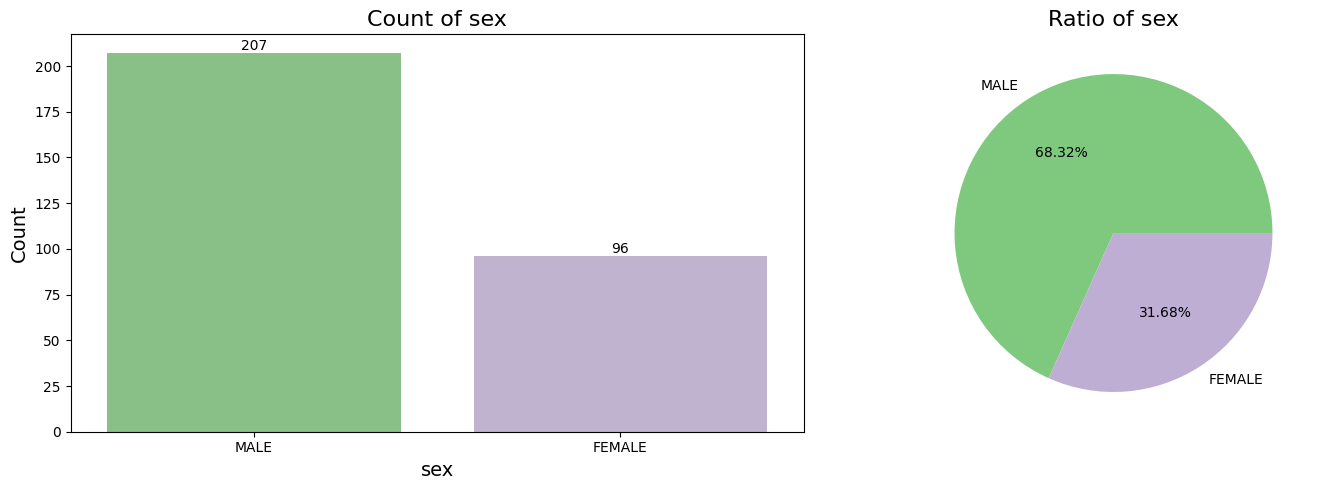

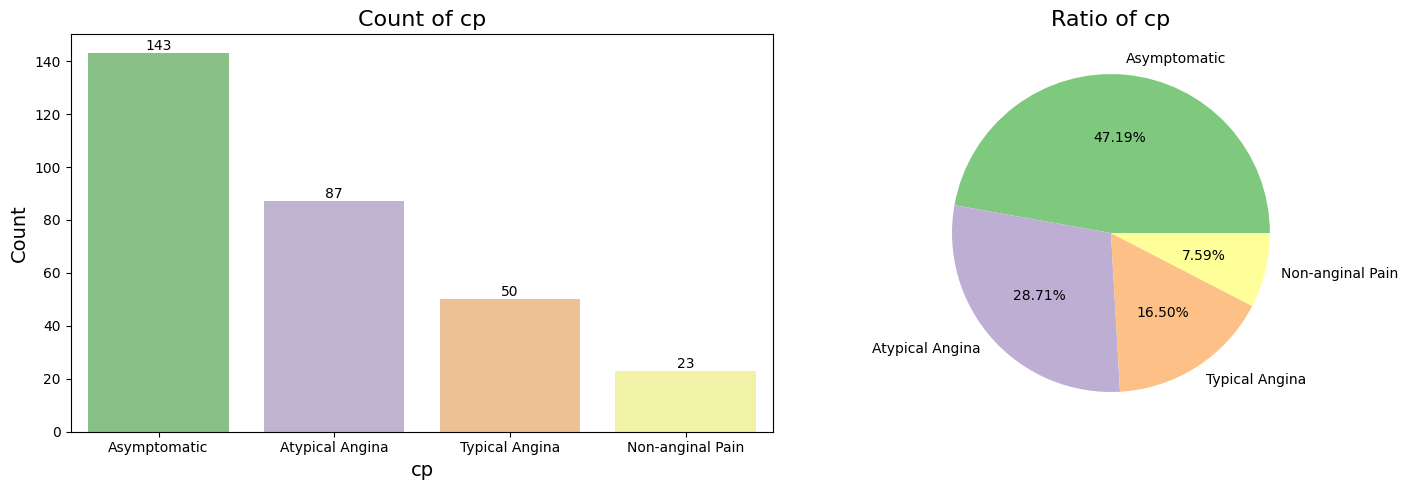

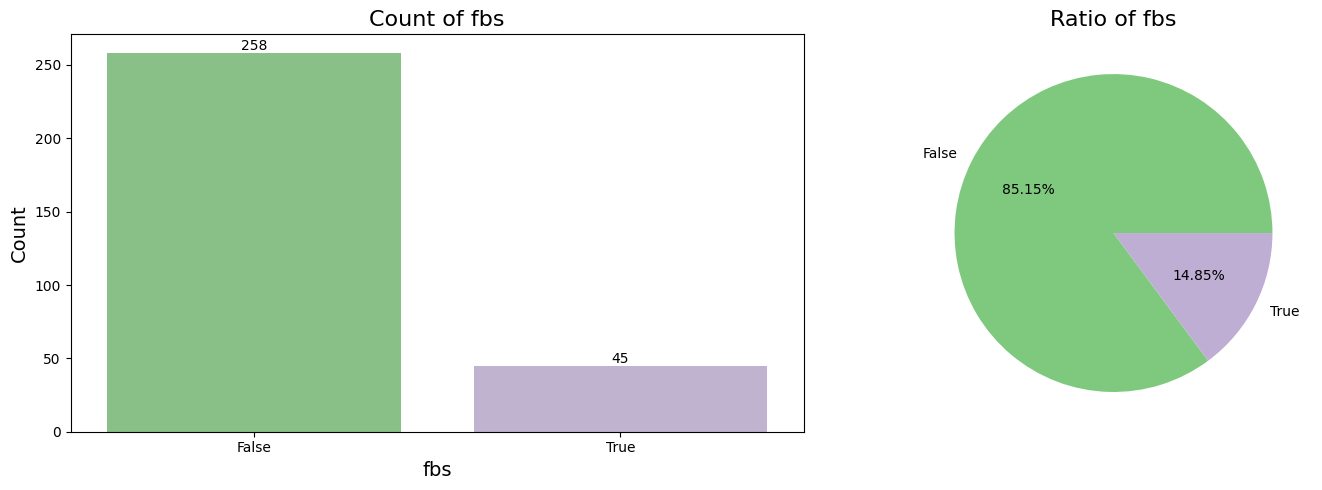

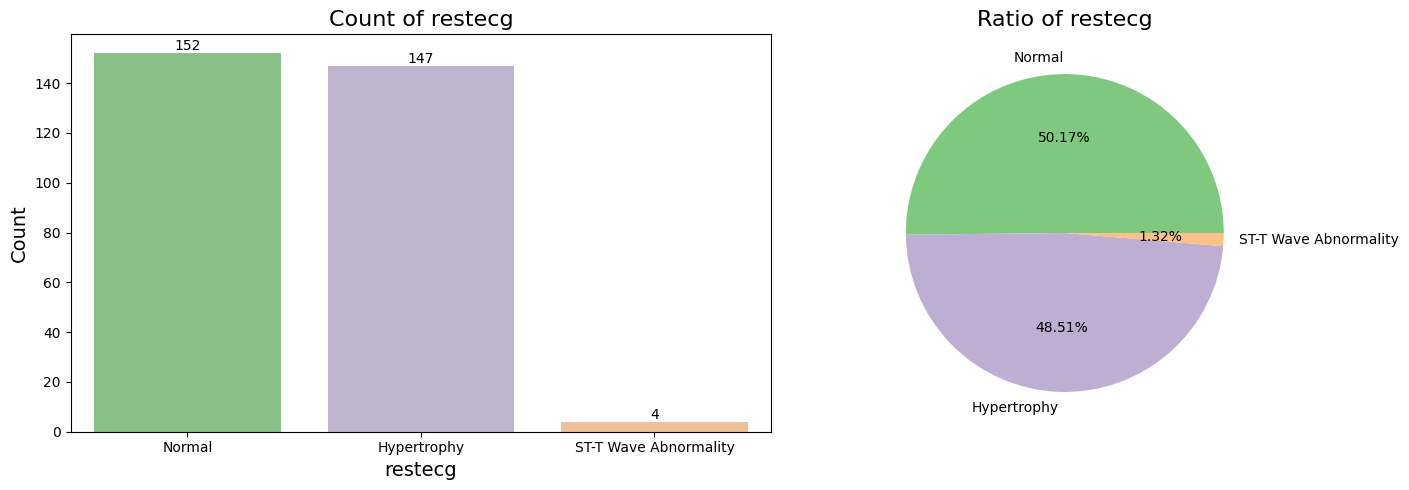

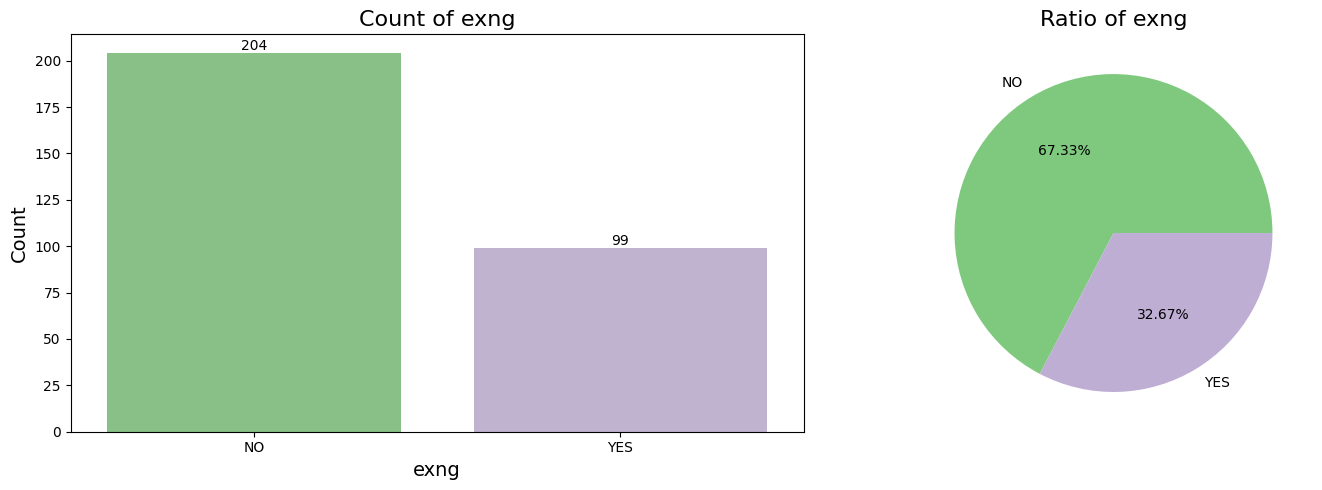

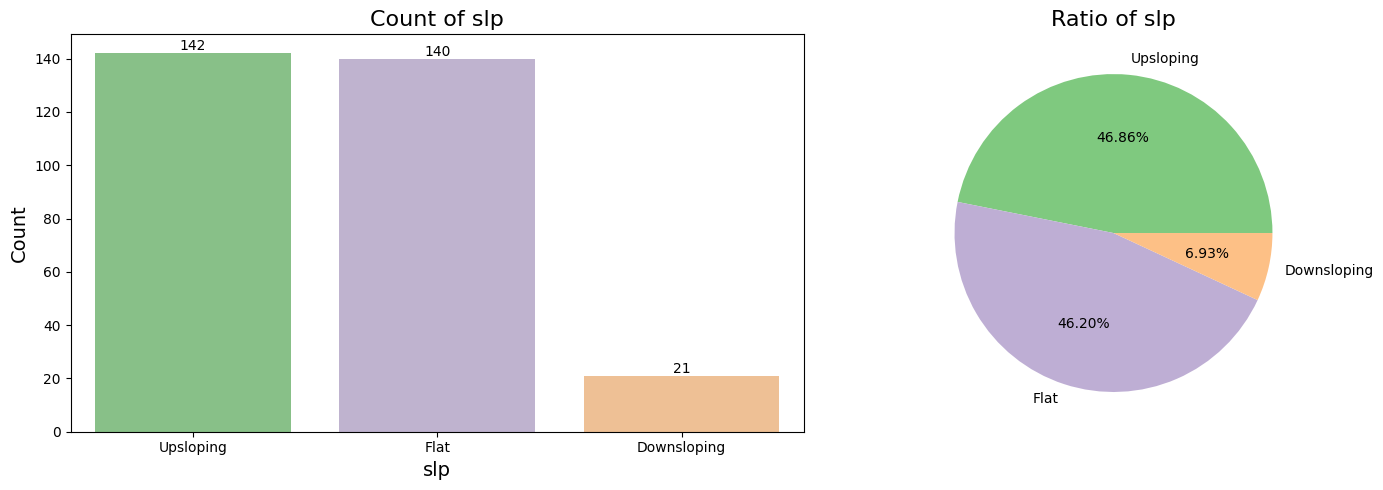

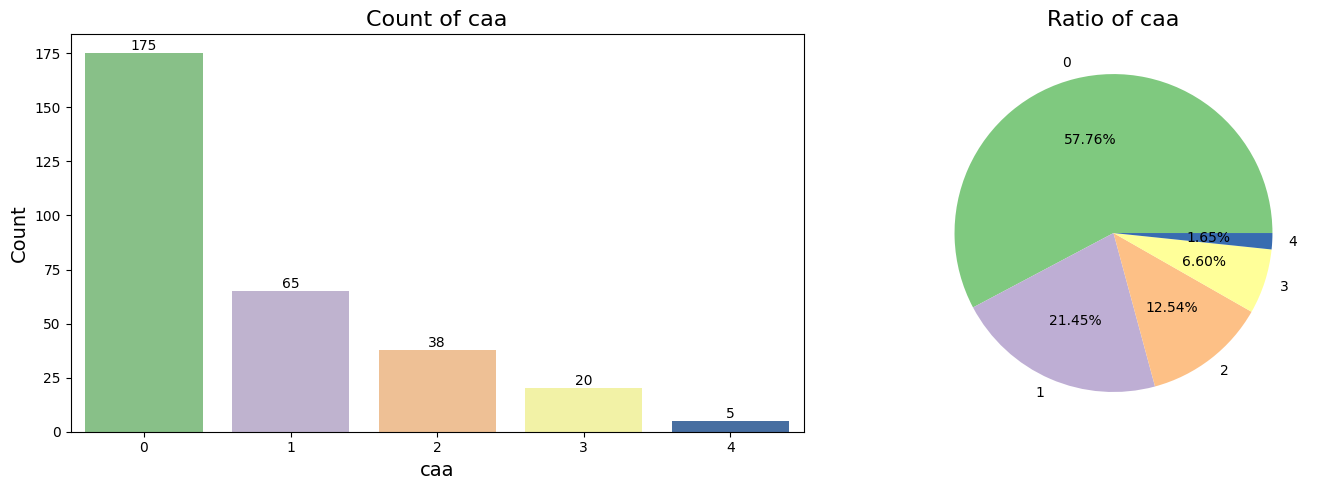

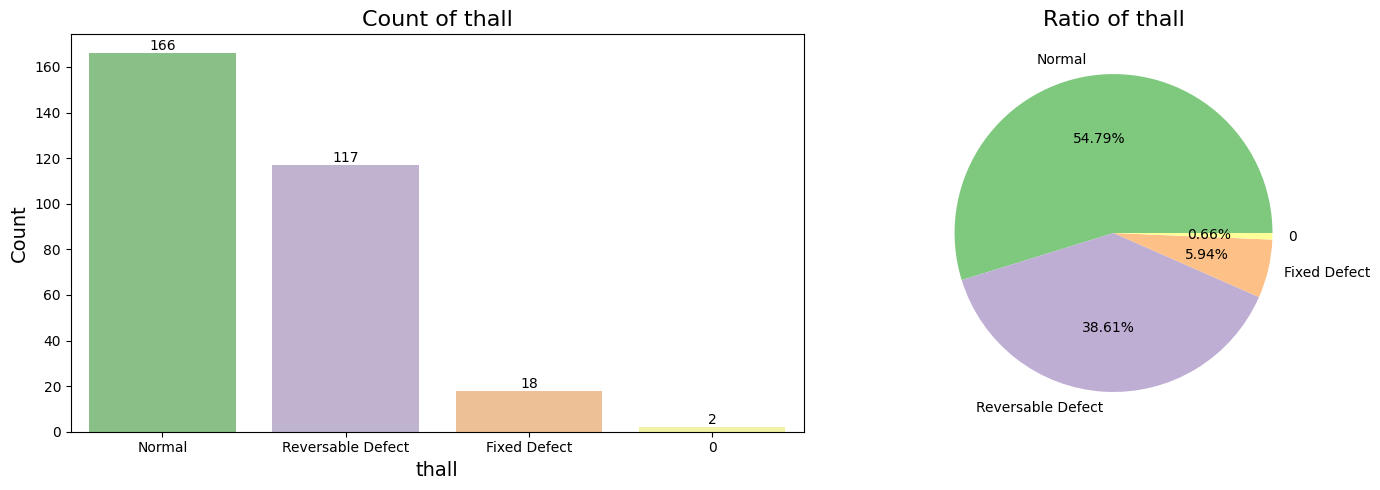

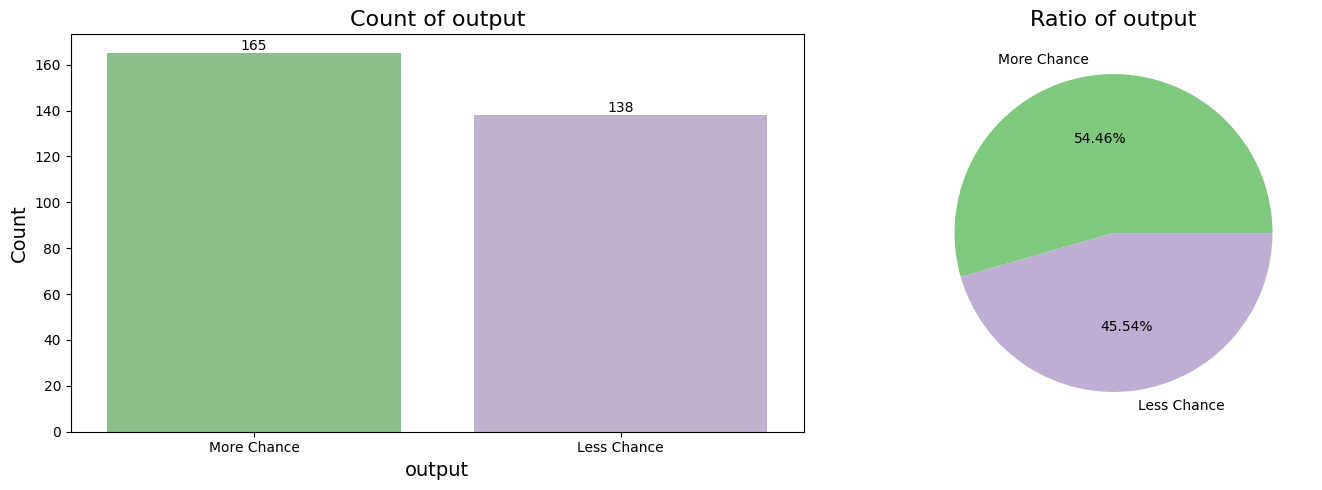

In [24]:
palette_color = sns.color_palette('Accent')

for col in df_copy[cat_cols]:
  fig, axs = plt.subplots(1,2, figsize = (15, 5))

# Countplot
  ax = sns.countplot(data=df_copy,
                     x=df_copy[col],
                     ax = axs[0],
                     order = df_copy[col].value_counts().index,
                     palette='Accent');

  for container in ax.containers:
      ax.bar_label(container, fontsize=10)

  ax.set_xlabel(f'{col}', fontsize=14)
  ax.set_ylabel('Count', fontsize=14)
  axs[0].set_title(f"Count of {col}", fontsize=16)

# Pie plot
  ax2 = df_copy[col].value_counts().plot.pie( ylabel='',
                                             ax = axs[1],
                                             colors=[palette_color[i] for i in range(df_copy[col].nunique())],
                                             autopct='%.2f%%');
  axs[1].set_title(f"Ratio of {col}", fontsize=16);
  plt.tight_layout()

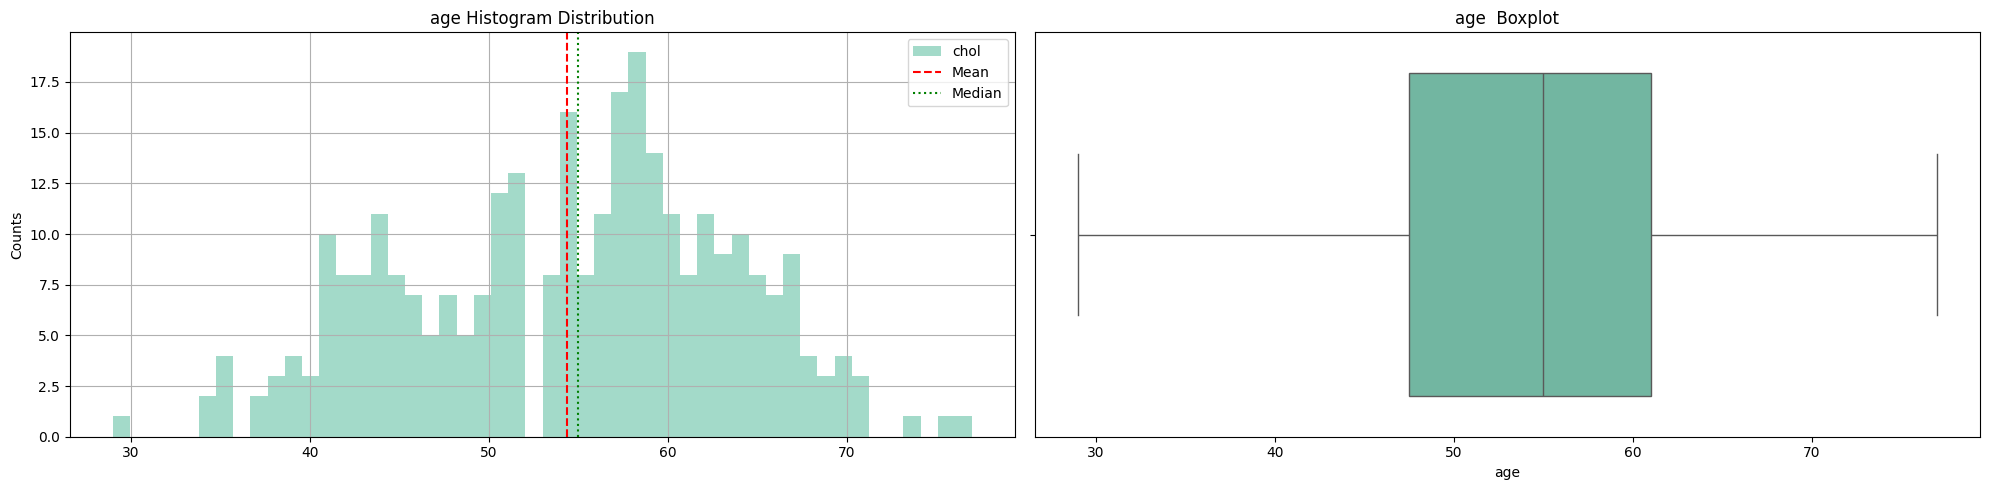

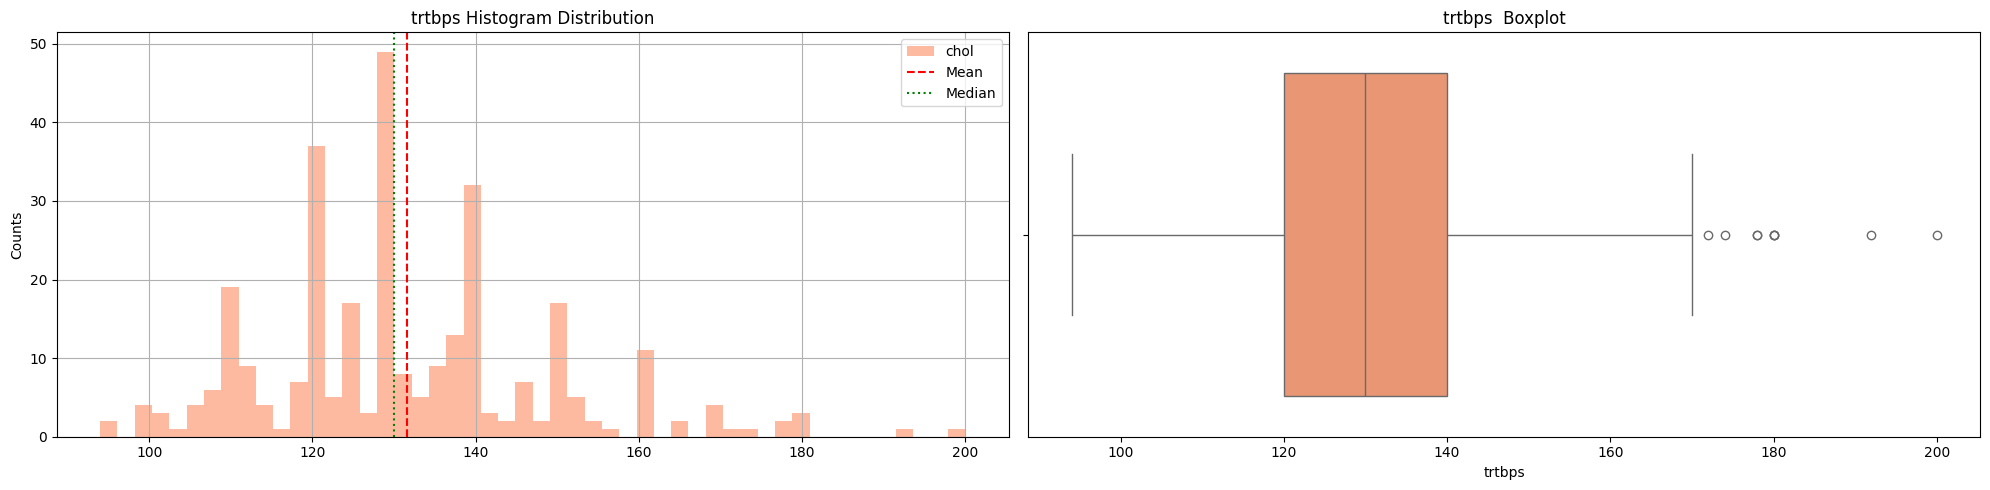

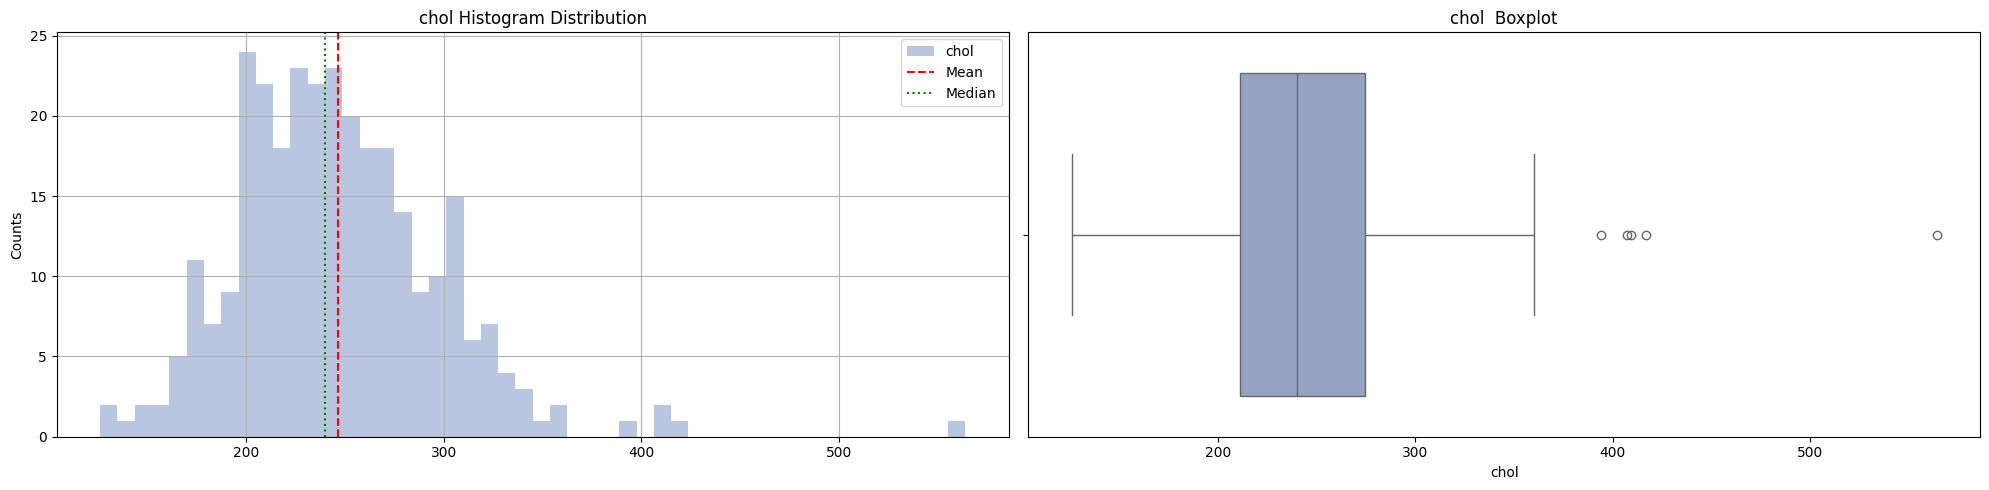

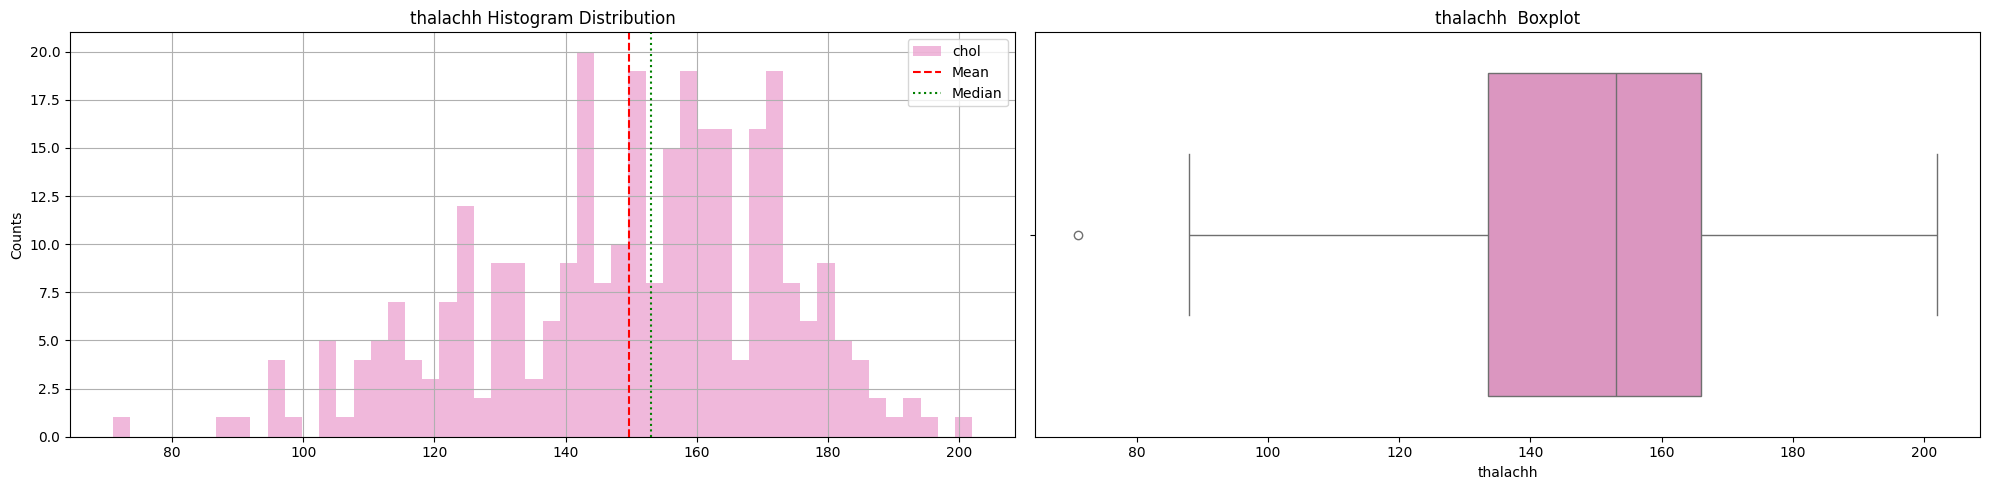

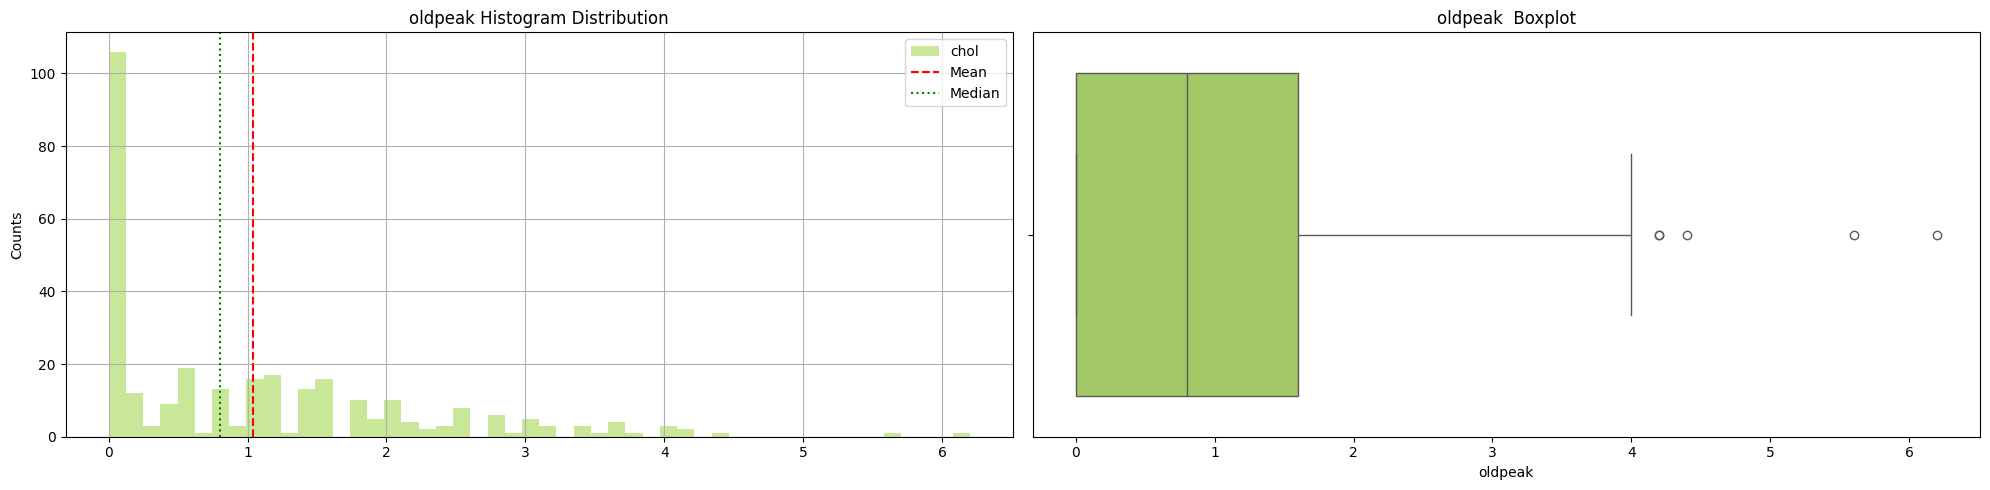

In [26]:
palette_color = sns.color_palette('Set2')

for idx, col in enumerate(df_copy[num_cols]):
  plt.figure(figsize=(20, 5))

  plt.subplot(1, 2, 1)
  df_copy[col].hist(bins=50, label='chol', alpha=0.6, color=palette_color[idx])
  plt.axvline(np.mean(df_copy[col]), ls='--', c='r', label="Mean")
  plt.axvline(np.median(df_copy[col]), ls=':', c='g', label="Median")
  plt.ylabel("Counts")
  plt.title(f"{col} Histogram Distribution");
  plt.legend()

  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_copy[col], data=df_copy, color=palette_color[idx])
  plt.title(f"{col}  Boxplot")
  plt.tight_layout()

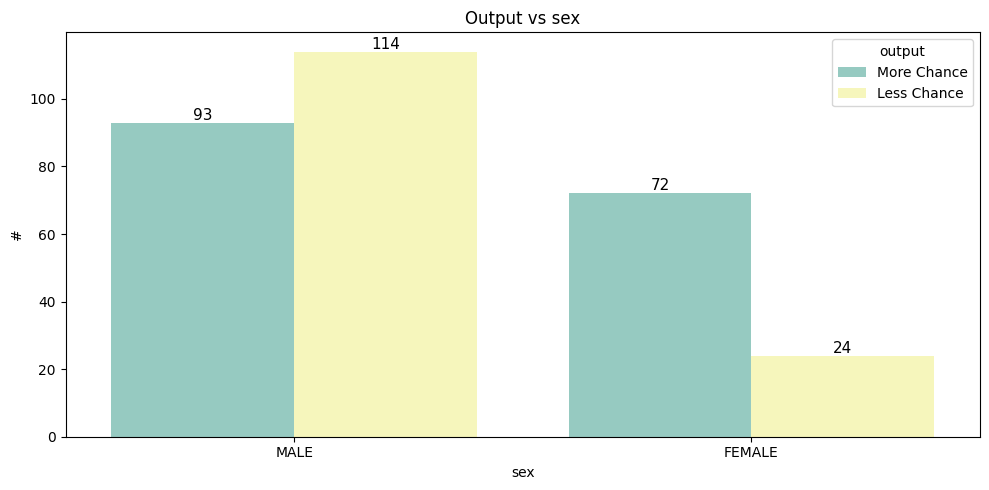

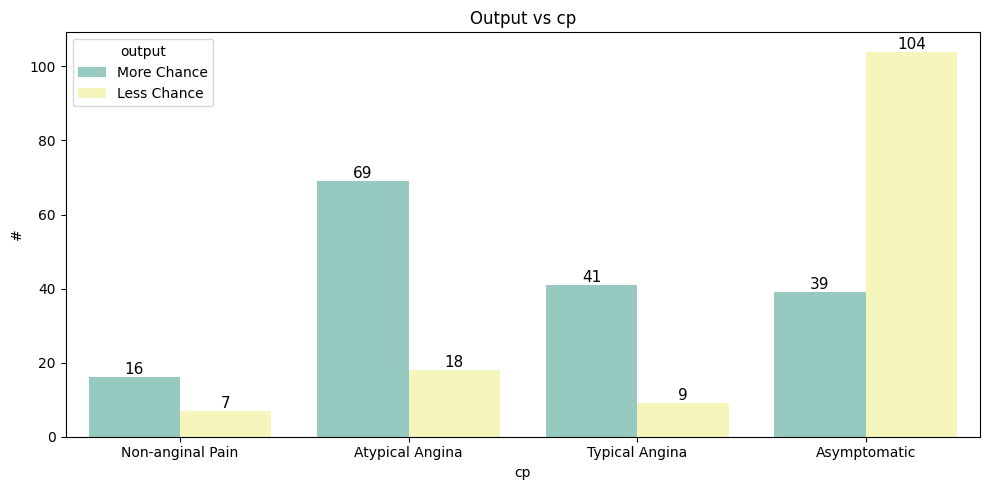

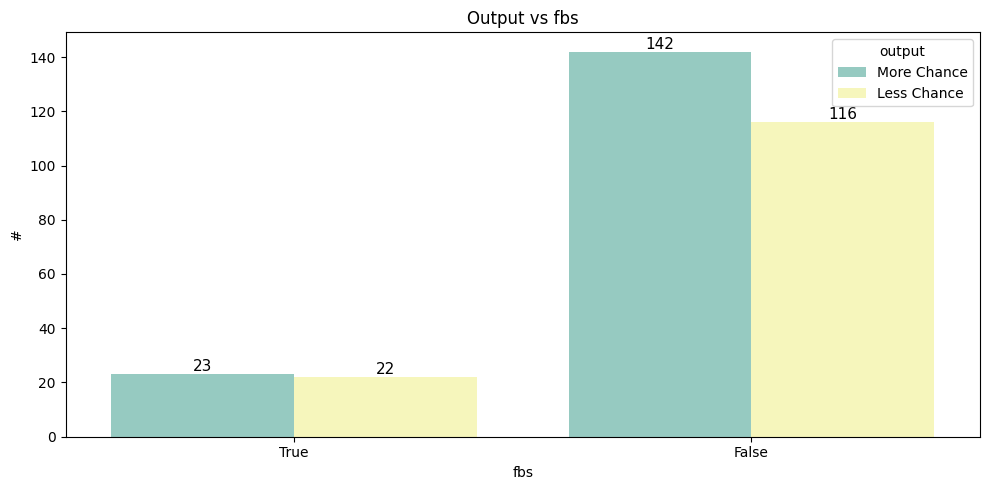

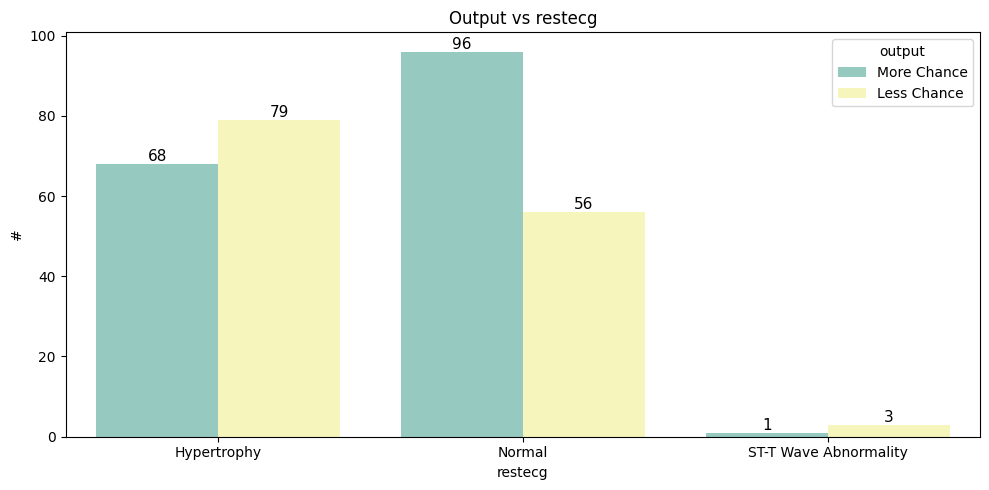

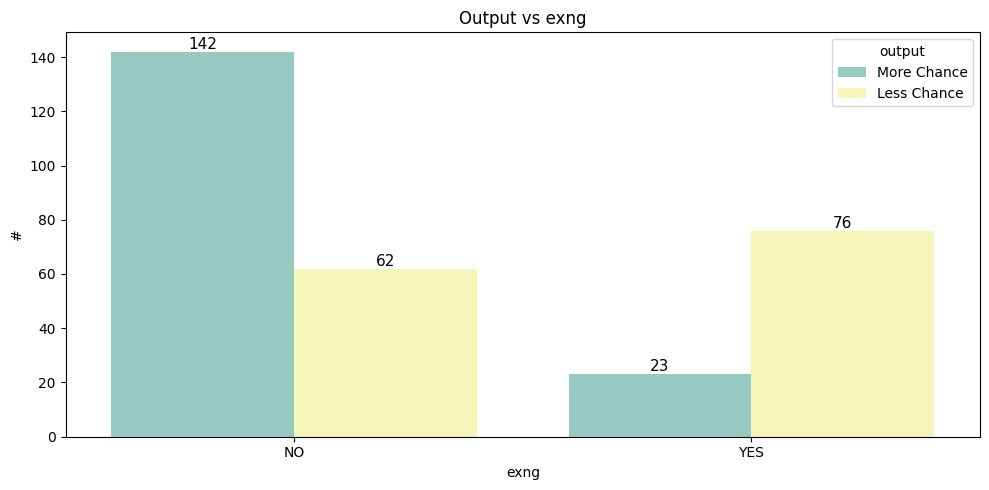

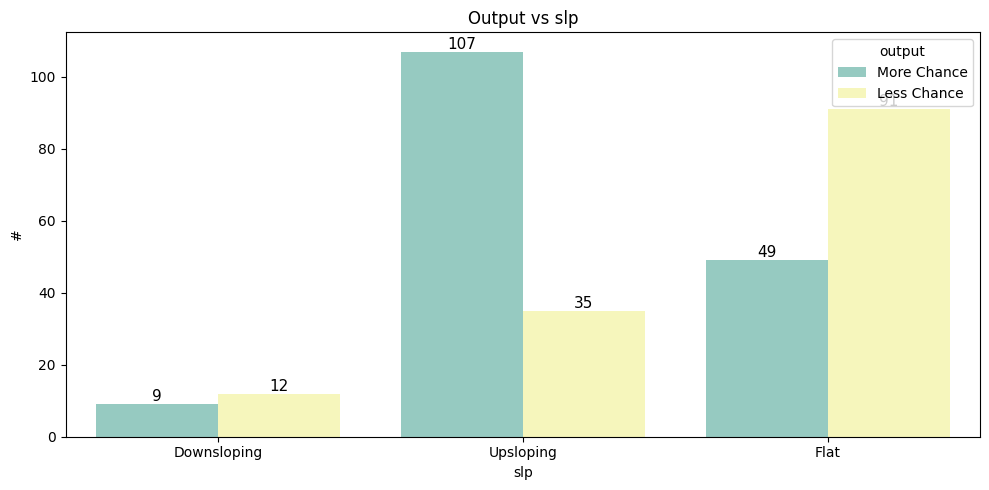

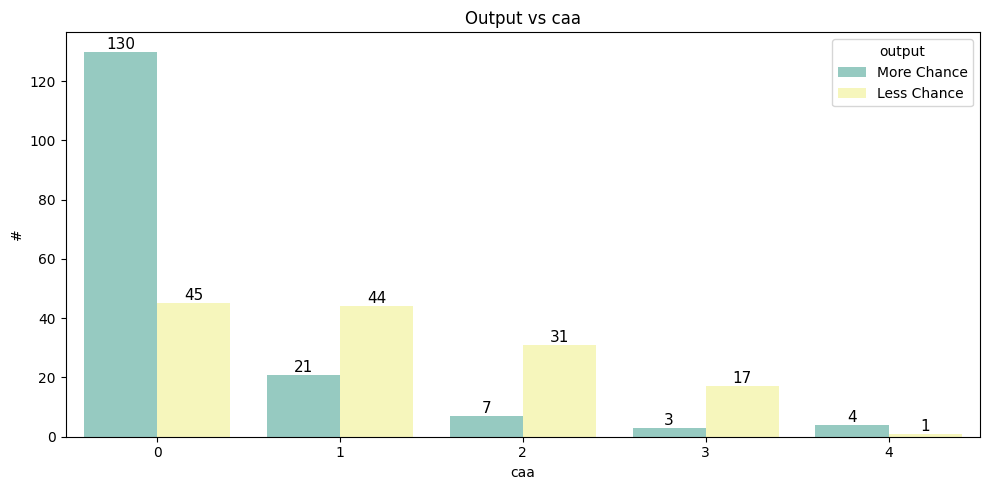

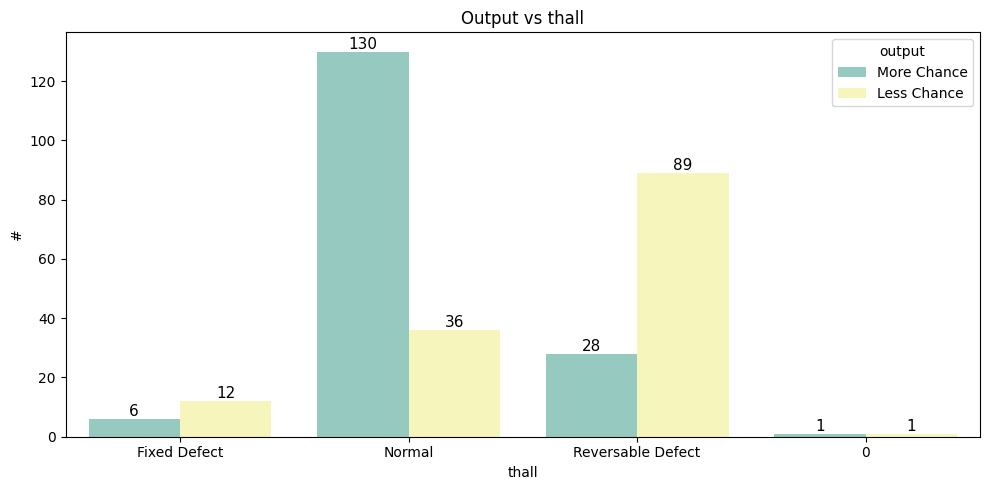

In [27]:
for col in cat_cols:
  if col == 'output':
    pass
  else:
    plt.subplots(1,1, figsize = (10, 5))
    ax = sns.countplot(data=df_copy,
                  x=df_copy[col],
                  hue=df_copy['output'],
                  palette="Set3");
    for container in ax.containers:
      ax.bar_label(container, fontsize=11)
    plt.title(f"Output vs {col}")
    plt.ylabel("#")
    plt.xlabel(f"{col}")
    plt.tight_layout()

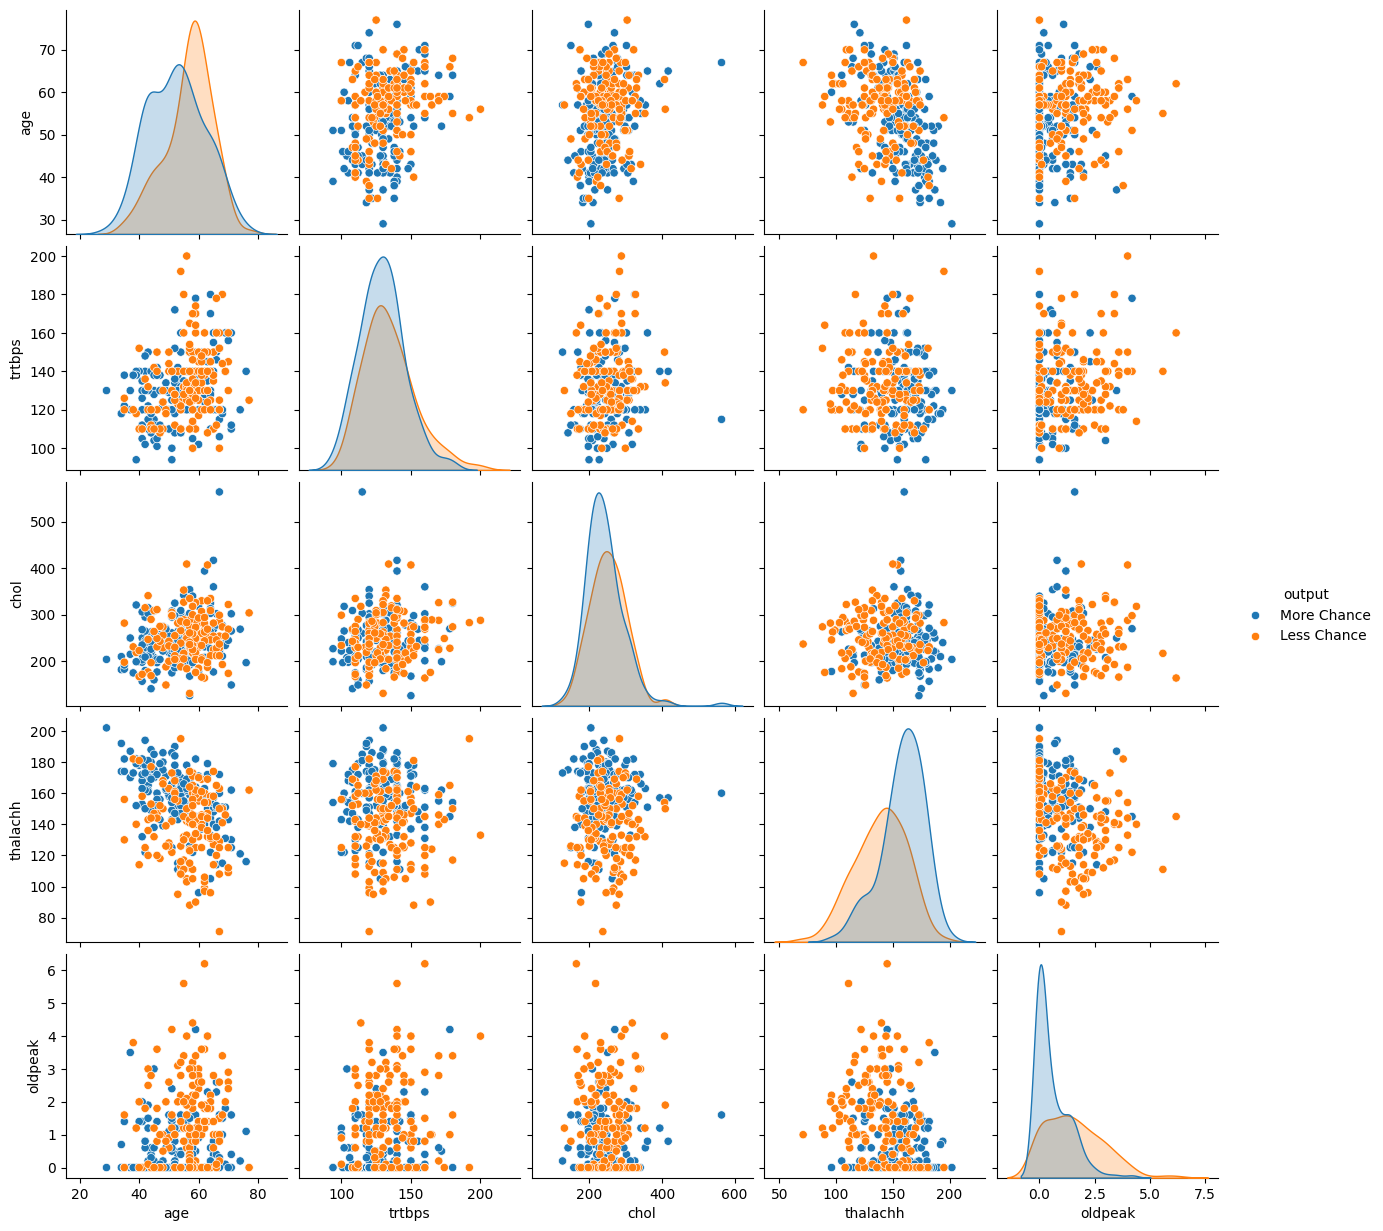

In [29]:
sns.pairplot(data=df_copy, hue = "output", vars = num_cols);

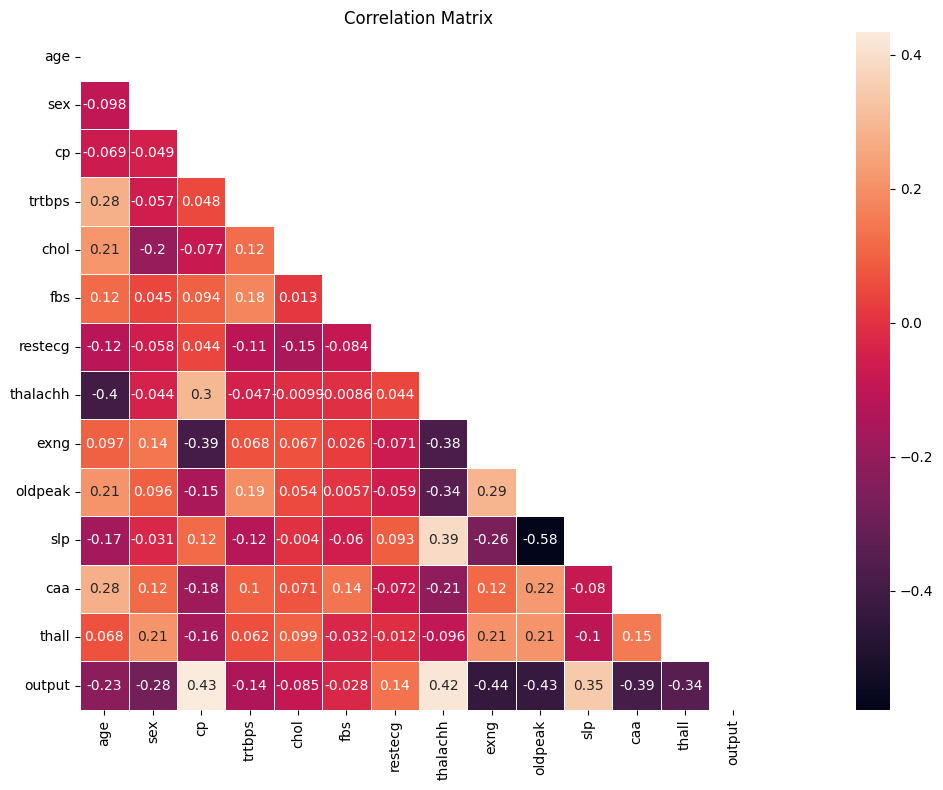

In [38]:
plt.figure(figsize=(20,8))
corr_mx = df.corr()
mask = np.triu(corr_mx)
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            mask=mask,
            annot=True)
plt.title("Correlation Matrix")
plt.tight_layout()